## USED CAR PRICE PREDICTION ##
### This project involves adapting the structure and methodology of the King Country Housing Price Prediction project to create a robust Car Price Prediction model. The primary goal is to accurately predict car prices based on a variety of features using multiple regression analysis. This model will leverage the SciKit-learn Python library for its development and training phases. The project draws inspiration from the original housing price model's  exploratory data analysis (EDA) and feature engineering processes, aiming to identify and utilize ###

## Using a dataset from Kaggle, https://www.kaggle.com/datasets/jacksondivakarr/sample34/data ##
### data colums are: car_name, registration_year, insurance_validity, fuel_type	seats, kms_driven, ownership, transmission	manufacturing_year, mileage(kmpl), engine(cc), max_power(bhp), torque(Nm), price(in lakhs) ###

In [6]:
# Libraries Import
import os
import pandas as pd
import numpy as np
import pickle 
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Load the dataset
file_path = 'processes2.csv'
car_data = pd.read_csv(file_path)

In [42]:
# Display the first few rows of the dataset
car_data.head(5)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [8]:
import pandas as pd
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


## data cleaning and missing values ##

In [10]:
# Drop the 'Unnamed: 0' column as it is unnecessary
car_data_cleaned = car_data.drop(columns=['Unnamed: 0'])

In [44]:
# Check for missing values
missing_values = car_data_cleaned.isnull().sum()

# Display the missing values count
missing_values

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical variables
categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Mileage Unit']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(car_data_cleaned[categorical_columns])

# Create a DataFrame with the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and add the encoded ones
car_data_encoded = pd.concat([car_data_cleaned.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

# Separate features and target variable
X = car_data_encoded.drop(columns=['selling_price'])
y = car_data_encoded['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(categorical_columns)
print(X)

/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Mileage Unit']
      year  km_driven  seats  max_power (in bph)  Mileage  Engine (CC)  \
0     2014     145500      5               74.00    23.40         1248   
1     2010     127000      5               90.00    23.00         1396   
2     2017      45000      5               81.86    20.14         1197   
3     2011      90000      5               67.10    23.59         1364   
4     2013     169000      5               68.10    20.00         1399   
...    ...        ...    ...                 ...      ...          ...   
2090  2017      12000      5               67.04    23.10          998   
2091  2014      50000      5               67.06    23.59         1364   
2092  2011      73000      5               46.30    19.70          796   
2093  2017      80000      5               67.04    20.51          998   
2094  2014      80000      5               88.73    22.54         1396   

      name_Chevrolet  name_Ford  name_

### Now, let's train a Regression model to predict car prices. We'll use a simple linear regression model to start. Once the model is trained, we can evaluate its performance on the test set ###

## Also trying out a Random Forest Regressor, which is a more robust model for this type of task ##

## Next, let's visualize the results. We can plot: Feature importances to understand which features contribute the most to the model. A scatter plot of the true vs. predicted values to evaluate the model's performance ##

Random Forest - MSE: 4843804958.66075, R2: 0.8975289425251739
Linear Regression - MSE: 9808386005.082348, R2: 0.7925028578483548


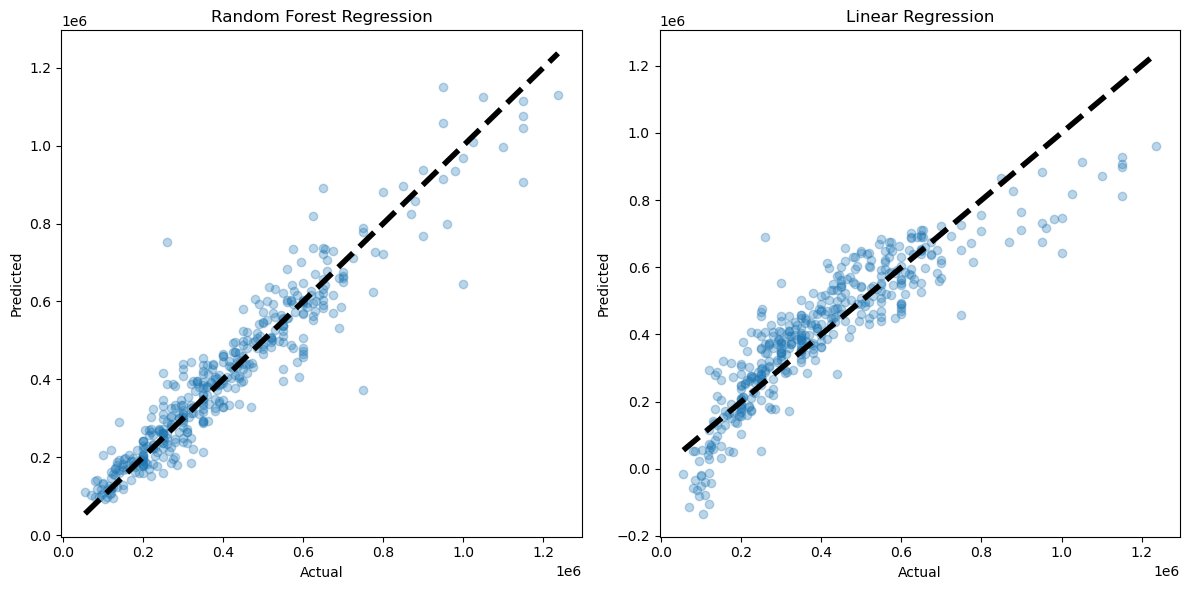

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'processes2.csv'  
car_data_cleaned = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if necessary
if 'Unnamed: 0' in car_data_cleaned.columns:
    car_data_cleaned = car_data_cleaned.drop(columns=['Unnamed: 0'])

# Define the feature columns and target column
feature_columns = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 
                   'transmission', 'owner', 'seats', 'max_power (in bph)', 
                   'Mileage', 'Engine (CC)']
target_column = 'selling_price'

# Separate the features and target
X = car_data_cleaned[feature_columns]
y = car_data_cleaned[target_column]

# One-hot encode categorical variables
categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

# Visualize the predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.tight_layout()
plt.show()


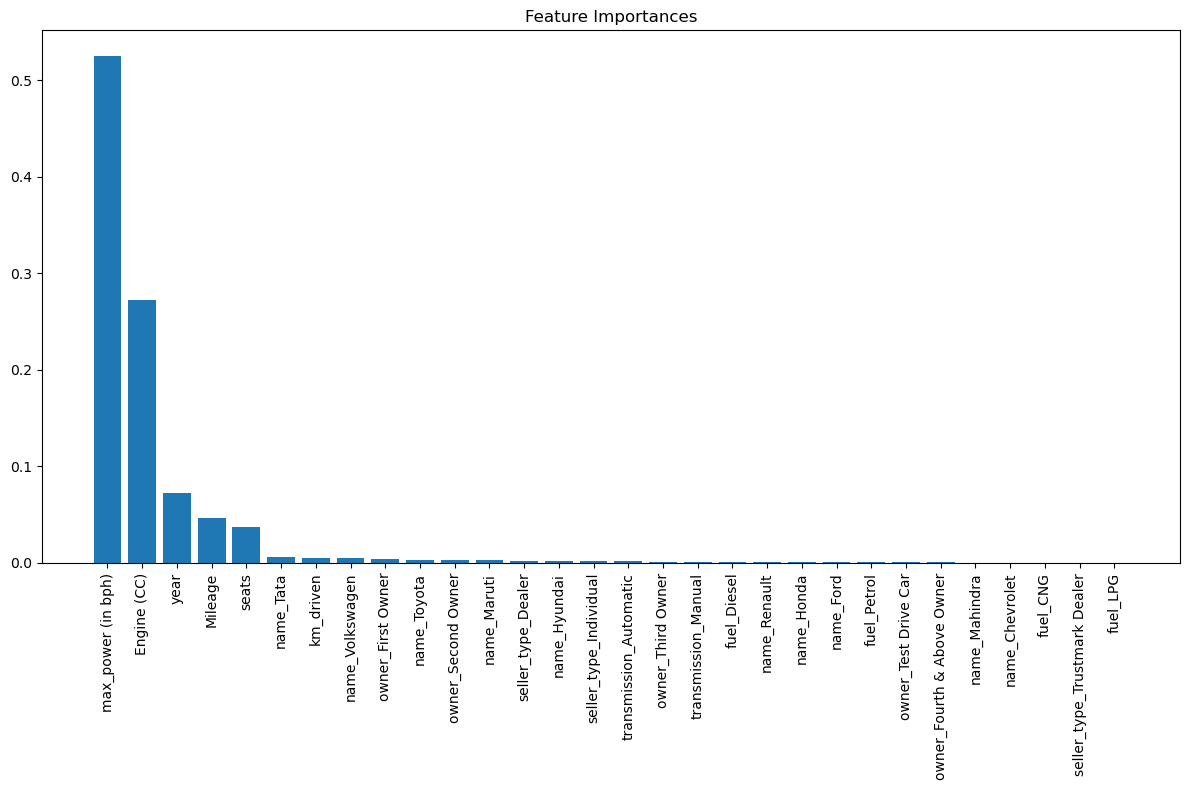

In [17]:
# Visualize Feature Importances
# Get feature importances
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)
feature_names = np.append(feature_names, X.columns.difference(categorical_features))
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_encoded.shape[1]), importances[indices], align='center')
plt.xticks(range(X_encoded.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [40]:
import joblib

# Save the preprocessor and model
joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(rf, 'random_forest_model.joblib')




['random_forest_model.joblib']

In [38]:
import pandas as pd

# Define the dataset loading and preprocessing code
dataset_loading_code = """
car_data = pd.read_csv('processes2.csv')  

# Example preprocessing steps
car_data_cleaned = car_data.dropna()  # Remove rows with missing values
# Add any other preprocessing steps here if needed

missing_values = car_data_cleaned.isnull().sum()
"""

# Execute the dataset loading code
exec(dataset_loading_code)

# Check the first few rows of the cleaned dataset and missing values
print(car_data_cleaned.head(5))



   Unnamed: 0     name  year  selling_price  km_driven    fuel seller_type  \
0           0   Maruti  2014         450000     145500  Diesel  Individual   
1           2  Hyundai  2010         225000     127000  Diesel  Individual   
2           4  Hyundai  2017         440000      45000  Petrol  Individual   
3           7   Toyota  2011         350000      90000  Diesel  Individual   
4           8     Ford  2013         200000     169000  Diesel  Individual   

  transmission        owner  seats  max_power (in bph) Mileage Unit  Mileage  \
0       Manual  First Owner      5               74.00         kmpl    23.40   
1       Manual  First Owner      5               90.00         kmpl    23.00   
2       Manual  First Owner      5               81.86         kmpl    20.14   
3       Manual  First Owner      5               67.10         kmpl    23.59   
4       Manual  First Owner      5               68.10         kmpl    20.00   

   Engine (CC)  
0         1248  
1         1396  